In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
data = pd.read_csv('pokemon_dataset.csv', header=0)

In [4]:
data.head()

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed


In [6]:
data.shape

(721, 23)

In [8]:
data.dtypes

Number                int64
Name                 object
Type_1               object
Type_2               object
Total                 int64
HP                    int64
Attack                int64
Defense               int64
Sp_Atk                int64
Sp_Def                int64
Speed                 int64
Generation            int64
isLegendary            bool
Color                object
hasGender              bool
Pr_Male             float64
Egg_Group_1          object
Egg_Group_2          object
hasMegaEvolution       bool
Height_m            float64
Weight_kg           float64
Catch_Rate            int64
Body_Style           object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 721 entries, 0 to 720
Data columns (total 23 columns):
Number              721 non-null int64
Name                721 non-null object
Type_1              721 non-null object
Type_2              350 non-null object
Total               721 non-null int64
HP                  721 non-null int64
Attack              721 non-null int64
Defense             721 non-null int64
Sp_Atk              721 non-null int64
Sp_Def              721 non-null int64
Speed               721 non-null int64
Generation          721 non-null int64
isLegendary         721 non-null bool
Color               721 non-null object
hasGender           721 non-null bool
Pr_Male             644 non-null float64
Egg_Group_1         721 non-null object
Egg_Group_2         191 non-null object
hasMegaEvolution    721 non-null bool
Height_m            721 non-null float64
Weight_kg           721 non-null float64
Catch_Rate          721 non-null int64
Body_Style          721 non-

In [10]:
data.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

All variable are in relevant data types so no need to type cast. 
### Variables Type_2 and Egg_Group_2 have a lot of null values so we will ignore them in the analysis. First column 'Number' is an id and we can remove that too

In [12]:
data.groupby('isLegendary')['Name'].count()

isLegendary
False    675
True      46
Name: Name, dtype: int64

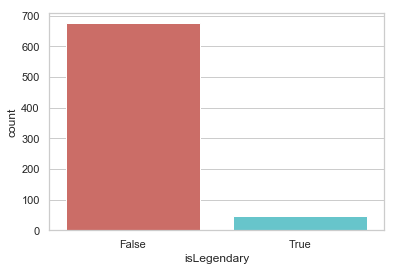

<Figure size 432x288 with 0 Axes>

In [13]:
sns.countplot(x='isLegendary',data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

Is legendary is our target variable(dependent). ~10% of pokemons in the raw dataset are legendary while 90% are not.

In [15]:
data.groupby('isLegendary').mean()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,hasGender,Pr_Male,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate
isLegendary,,,,,,,,,,,,,,,
False,353.663704,404.161481,66.634074,72.724444,68.711111,65.660741,66.752593,63.678519,3.291852,0.945185,0.551528,0.060741,1.056074,46.890222,106.625185
True,468.652174,620.217391,94.000000,108.608696,101.586957,113.891304,106.543478,95.586957,3.782609,0.130435,0.750000,0.108696,2.449565,201.797826,6.652174


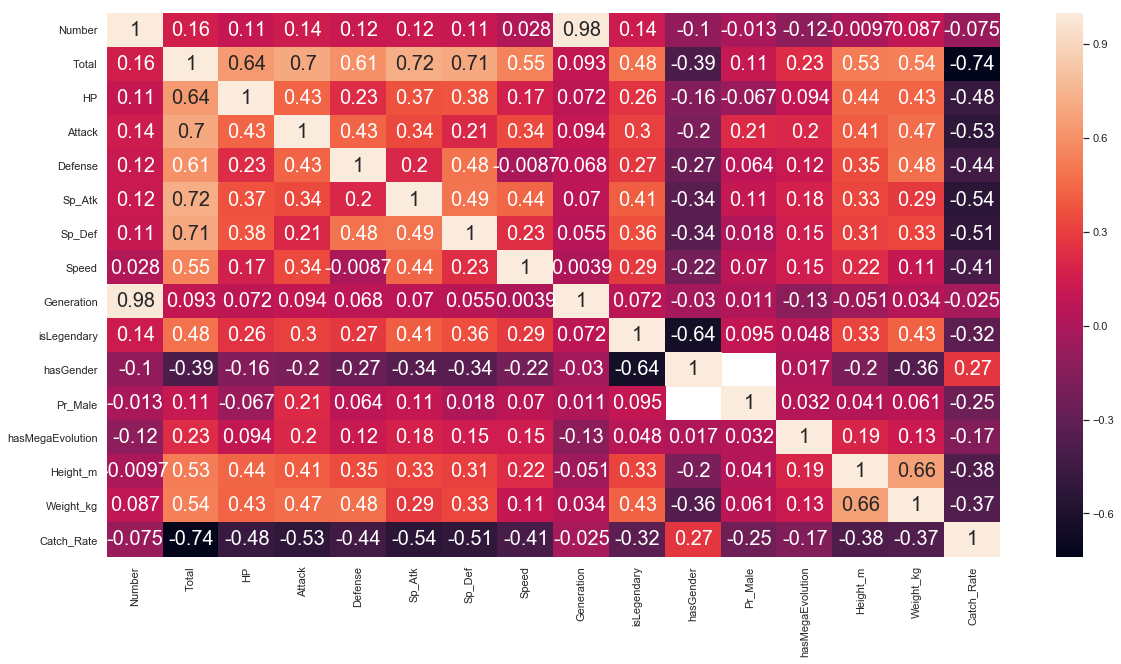

In [18]:
plt.figure(figsize=(20,10))
cor_mat = sns.heatmap(data.corr(), annot=True)

### From the correlation heat map, we can see that 
1. Total is highly correlated with components line attack,defence,HP,Sp_Atk,Sp_Def as it is a sum of all these individual variables. So total explains some variance from all of the individual components. So we can consider Total only for model training as other individual variable also have decent correlation with each other
2. Target variable 'is legendary' has good correlation with independent variables Total,has_gender,height,weight and catch rate 

### From continuous and boolean variables, we consider Total,has_gender,height,weight and catch rate for model training

Lets look at each of the remaining categorical variable that remian after above 2 exclusion steps - Type_1, Color, Egg_Group_1 and Body_Style

In [21]:
data.groupby('Type_1').mean()

,Number,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,isLegendary,hasGender,Pr_Male,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate
Type_1,,,,,,,,,,,,,,,,
Bug,344.222222,365.126984,55.952381,65.222222,67.698413,54.031746,62.158730,60.063492,3.301587,0.000000,0.968254,0.497951,0.063492,0.859206,29.250794,119.492063
Dark,479.000000,434.750000,67.178571,86.250000,67.928571,70.500000,67.500000,75.392857,4.178571,0.071429,0.928571,0.504808,0.107143,1.146071,39.850000,86.964286
Dragon,482.958333,501.958333,78.041667,102.625000,79.125000,82.458333,83.041667,76.666667,3.958333,0.291667,0.791667,0.500000,0.250000,2.038750,114.912500,36.375000
Electric,346.277778,420.694444,59.500000,67.777778,59.083333,83.083333,67.722222,83.527778,3.166667,0.083333,0.777778,0.558036,0.055556,0.895000,37.447222,109.972222
Fairy,449.529412,413.176471,74.117647,61.529412,65.705882,78.529412,84.705882,48.588235,4.117647,0.058824,0.941176,0.421875,0.000000,0.835294,24.923529,120.294118
Fighting,362.720000,404.360000,70.240000,94.720000,64.280000,48.560000,63.680000,62.880000,3.360000,0.000000,1.000000,0.730000,0.080000,1.168400,54.924000,103.000000
Fire,337.829787,443.021277,68.595745,82.212766,64.893617,83.468085,69.468085,74.382979,3.276596,0.106383,0.914894,0.683140,0.063830,1.163617,63.976596,74.787234
Flying,690.000000,453.333333,68.000000,71.666667,61.666667,89.000000,66.666667,96.333333,5.666667,0.333333,1.000000,0.666667,0.000000,1.170000,52.000000,79.333333
Ghost,450.869565,423.652174,61.565217,67.521739,75.956522,81.304348,76.478261,60.826087,3.913043,0.043478,0.956522,0.500000,0.086957,1.301304,53.813043,98.391304


Text(0, 0.5, 'No.of pokemons')

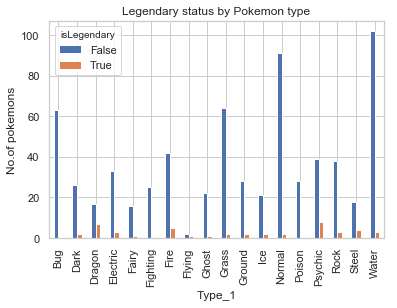

In [20]:
pd.crosstab(data.Type_1,data.isLegendary).plot(kind='bar')
plt.title('Legendary status by Pokemon type')
plt.xlabel('Type_1')
plt.ylabel('No.of pokemons')

Pokemon Type_1 is a useful variable for modeling as it has good variance among total pokemon counts and legendary pokemon counts

Text(0, 0.5, 'No.of pokemons')

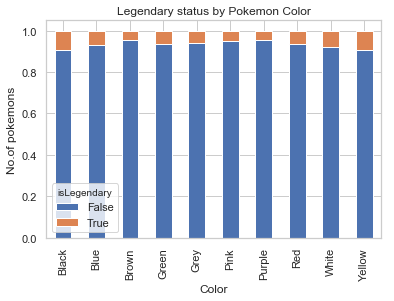

In [23]:
table=pd.crosstab(data.Color,data.isLegendary)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Legendary status by Pokemon Color')
plt.xlabel('Color')
plt.ylabel('No.of pokemons')

Pokemon Color is a useful variable for modeling as it has good variance among total pokemon counts and legendary pokemon counts

Text(0, 0.5, 'No.of pokemons')

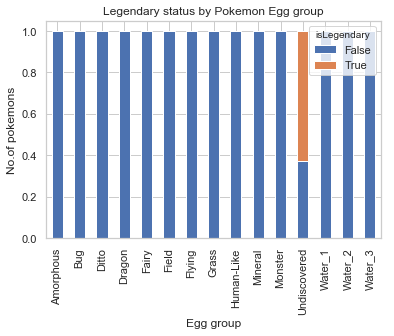

In [24]:
table=pd.crosstab(data.Egg_Group_1,data.isLegendary)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Legendary status by Pokemon Egg group')
plt.xlabel('Egg group')
plt.ylabel('No.of pokemons')

Egg group is not a good fit for model training as majority of legendary pkemons have Egg group as undiscovered

Text(0, 0.5, 'No.of pokemons')

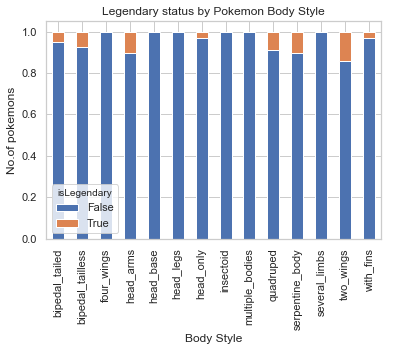

In [26]:
table=pd.crosstab(data.Body_Style,data.isLegendary)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Legendary status by Pokemon Body Style')
plt.xlabel('Body Style')
plt.ylabel('No.of pokemons')

In [27]:
data_1 = data.copy()

Pokemon Body style is a useful variable for modeling as it has good variance among total pokemon counts and legendary pokemon counts

In [28]:
#Getting dummies for categorical variables
cat_vars=['Type_1','Color','Body_Style']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data_1.join(cat_list)
    data_1=data1

In [31]:
data_1.columns

Index(['Number', 'Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack',
       'Defense', 'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary',
       'Color', 'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style',
       'Type_1_Bug', 'Type_1_Dark', 'Type_1_Dragon', 'Type_1_Electric',
       'Type_1_Fairy', 'Type_1_Fighting', 'Type_1_Fire', 'Type_1_Flying',
       'Type_1_Ghost', 'Type_1_Grass', 'Type_1_Ground', 'Type_1_Ice',
       'Type_1_Normal', 'Type_1_Poison', 'Type_1_Psychic', 'Type_1_Rock',
       'Type_1_Steel', 'Type_1_Water', 'Color_Black', 'Color_Blue',
       'Color_Brown', 'Color_Green', 'Color_Grey', 'Color_Pink',
       'Color_Purple', 'Color_Red', 'Color_White', 'Color_Yellow',
       'Body_Style_bipedal_tailed', 'Body_Style_bipedal_tailless',
       'Body_Style_four_wings', 'Body_Style_head_arms', 'Body_Style_head_base',
       'Body_Style_head_legs', 'Body_Style_head_only', 'Body_Style_

In [36]:
cols_tokeep = ['Total','hasGender','Height_m','Weight_kg','Catch_Rate','Type_1_Bug', 'Type_1_Dark', 'Type_1_Dragon', 'Type_1_Electric',
       'Type_1_Fairy', 'Type_1_Fighting', 'Type_1_Fire', 'Type_1_Flying',
       'Type_1_Ghost', 'Type_1_Grass', 'Type_1_Ground', 'Type_1_Ice',
       'Type_1_Normal', 'Type_1_Poison', 'Type_1_Psychic', 'Type_1_Rock',
       'Type_1_Steel', 'Type_1_Water', 'Color_Black', 'Color_Blue',
       'Color_Brown', 'Color_Green', 'Color_Grey', 'Color_Pink',
       'Color_Purple', 'Color_Red', 'Color_White', 'Color_Yellow',
       'Body_Style_bipedal_tailed', 'Body_Style_bipedal_tailless',
       'Body_Style_four_wings', 'Body_Style_head_arms', 'Body_Style_head_base',
       'Body_Style_head_legs', 'Body_Style_head_only', 'Body_Style_insectoid',
       'Body_Style_multiple_bodies', 'Body_Style_quadruped',
       'Body_Style_serpentine_body', 'Body_Style_several_limbs',
       'Body_Style_two_wings', 'Body_Style_with_fins','isLegendary']

In [37]:
data_2 = data_1[cols_tokeep]
data_2.columns

Index(['Total', 'hasGender', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Type_1_Bug', 'Type_1_Dark', 'Type_1_Dragon', 'Type_1_Electric',
       'Type_1_Fairy', 'Type_1_Fighting', 'Type_1_Fire', 'Type_1_Flying',
       'Type_1_Ghost', 'Type_1_Grass', 'Type_1_Ground', 'Type_1_Ice',
       'Type_1_Normal', 'Type_1_Poison', 'Type_1_Psychic', 'Type_1_Rock',
       'Type_1_Steel', 'Type_1_Water', 'Color_Black', 'Color_Blue',
       'Color_Brown', 'Color_Green', 'Color_Grey', 'Color_Pink',
       'Color_Purple', 'Color_Red', 'Color_White', 'Color_Yellow',
       'Body_Style_bipedal_tailed', 'Body_Style_bipedal_tailless',
       'Body_Style_four_wings', 'Body_Style_head_arms', 'Body_Style_head_base',
       'Body_Style_head_legs', 'Body_Style_head_only', 'Body_Style_insectoid',
       'Body_Style_multiple_bodies', 'Body_Style_quadruped',
       'Body_Style_serpentine_body', 'Body_Style_several_limbs',
       'Body_Style_two_wings', 'Body_Style_with_fins', 'isLegendary'],
      dtype='object

In [35]:
data_2.shape

(721, 47)

### Feature Selection

In [38]:
# Split dependent and independent variables
y=['isLegendary']
X=[i for i in data_2 if i not in y]

In [43]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 18)
rfe = rfe.fit(data_2[X], data_2[y] )
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False False  True False  True False False False  True
  True False False False False  True False  True False False  True False
 False False  True  True False False  True False False False False False
 False  True False False False  True  True  True False  True  True]
[28  1  1 30 13  1 10  1  6 12 21  1  1 27  9  3 18  1 25  1 17  5  1 23
 15  4  1  1 11  7  1  8 16 29 19 14  2  1 20 22 24  1  1  1 26  1  1]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will b

In [45]:
Sel_features = [ 'hasGender', 'Height_m', 'Type_1_Bug', 'Type_1_Dragon', 'Type_1_Fire', 'Type_1_Flying', 'Type_1_Normal', 'Type_1_Psychic', 'Type_1_Water', 'Color_Green', 'Color_Grey', 'Color_Red', 'Body_Style_head_base', 'Body_Style_multiple_bodies', 'Body_Style_quadruped', 'Body_Style_serpentine_body', 'Body_Style_two_wings', 'Body_Style_with_fins']

In [47]:
# Split dependent and independent variables from dataset
X=data_2[Sel_features]
y=data_2['isLegendary']

### Model Implementation

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [52]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[195   2]
 [  9  11]]


In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.99      0.97       197
        True       0.85      0.55      0.67        20

   micro avg       0.95      0.95      0.95       217
   macro avg       0.90      0.77      0.82       217
weighted avg       0.95      0.95      0.94       217



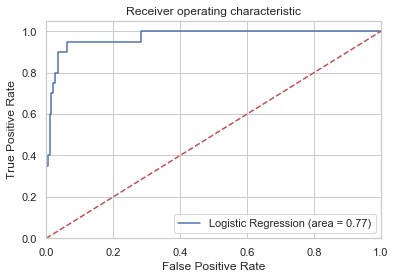

In [55]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Type 1 and Type 2 errors are in acceptable range. Trained model predicts Legendary status = No slightly better than Legendary status = Yes
Area under ROC curve is high